# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

In questo esercizio viene chiesto di aggiungere il calcolo della pressione $P$ al codice di Dinamica Molecolare che ci è stato fornito, dove è già implementato il calcolo dell'energia totale (interna) per particella $E/N$, dell'energia potenziale per particella $U/N$, dell'energia cinetica per particella $K/N$ e della temperatura $T$. La pressione, in un sistema di Lennard-Jones, può essere stimata attraverso il teorema del viriale, come:

$$ P = \rho k_B \langle T \rangle + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

Nell'implementazione di queste quantità sono state utlizzate unità di misura ridotte, in modo da poter sfruttare nelle simulazioni la legge degli stati corrispondenti, secondo cui diverse combinazioni di $\rho$, $T$, $\epsilon$ e $\sigma$ corrispondono tutte allo stesso stato in unità ridotte.

### Exercise 04.2

In questo esercizio viene chiesto di eseguire simulazioni di Dinamica Molecolare per stimare le proprietà macroscopiche di un *ensemble* microcanonico (NVE), utilizzando un modello Lennard-Jones di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu), nelle seguenti condizioni:

1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Il codice di Dinamica Molecolare utilizza l'algoritmo di Verlet per integrare le equazioni del moto, il quale approssima la posizione al tempo $t+\delta t$ come:

$$ \vec{r}(t+\delta t) \approx 2\vec{r}(t) - \vec{r}(t-\delta t) + \delta t^2\vec{a}(t)$$

dove $\delta$ è il passo di integrazione. Nota che il vettore posizione al tempo $t+\delta t$ è calcolato a partire dal vettore posizione al tempo $t$ e $t-\delta t$. Questa caratteristica rende l'algoritmo di Verlet un metodo a due passi, non *self-starting*. Pertanto, le posizioni e le velocità iniziali, $\vec{r}(0)$ e $\vec{v}(0)$, non sono sufficienti per iniziare un calcolo. Per ovviare a questo, si interpolano le posizioni associate all'istante precedente calcolando la quantità $\vec{r}_{old} = \vec{r} - \vec{v}\delta t$. Un'altra osservazione riguardante l'algoritmo di Verlet è che è propriamente centrato, cioè $\vec{r}(t-\delta t)$ e $\vec{r}(t+\delta t)$ giocano ruoli simmetrici, rendendolo reversibile nel tempo. Una caratteristica importante di questo algoritmo è che ha eccellenti proprietà di conservazione dell'energia anche con passi temporali lunghi.

Nella simulazione è stato considerato un sistema formato da $N=108$ particelle contenute in un box, con condizioni periodiche al contorno (PBC). Quindi ogni volta che una particella esce da un lato del box, viene riammessa dal lato opposto con la stessa velocità. 

### Equilibrazione

Monitorando la temperatura $T$ durante i primi passi temporali della simulazione, si osserva che all'inizio la temperatura varia. Questo succede perchè la configurazione perfettamente cristallina di partenza non è termodinamicamente stabile alla $T$ data. Equilibriamo quindi il sistema, ovvero risolviamo le equazioni del moto fino a quando la temperatura media non varia più nel tempo. Per fare questo, bisogna trovare, per ogni fase, il valore iniziale di $T$ necessario per stabilizzare, dopo un certo numero di passi temporali (tempo di equilibrazione), il valore medio di $T$ alla temperatura desiderata $T^\star$ a cui si vuole simulare il sistema. Fatta l'equilibrazione, eseguiamo la misura effettiva.

Dopo diversi tentativi, sono stati trovati i seguenti valori:

1. fase solida: $T^\star_{target} = 0.8$, $T^\star_0 = 1.54$ 
2. fase liquida: $T^\star_{target} = 1.1$, $T^\star_0 = 1.98$ 
3. fase gassosa: $T^\star_{target} = 1.2$, $T^\star_0 = 0.96$  

### Fase solida

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

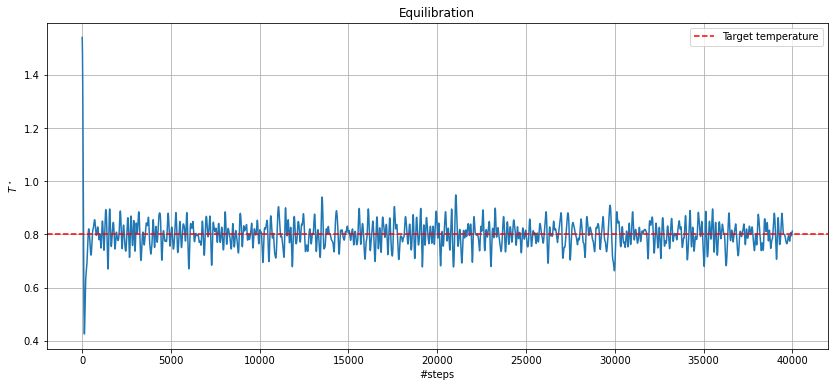

In [2]:
equilibration_temp = np.loadtxt('OUTPUT/Solid/equilibration_temp.dat')
step = np.arange(len(equilibration_temp)) + 1
plt.figure(figsize=(14,6))
plt.plot(step, equilibration_temp)
plt.axhline(y=0.8, color='r', ls='--', label='Target temperature')
plt.title('Equilibration')
plt.xlabel('#steps')
plt.ylabel(r'$T^\star$')
plt.legend()
plt.grid(True)
plt.show()

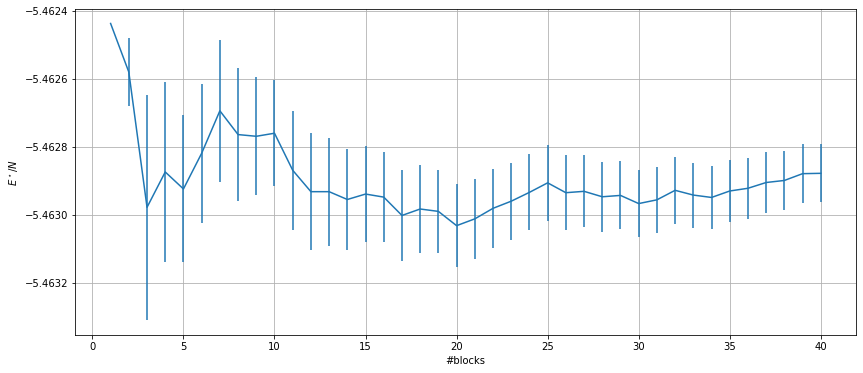

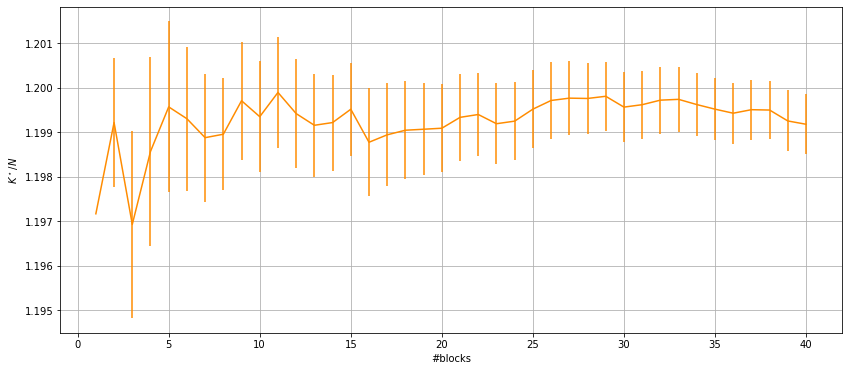

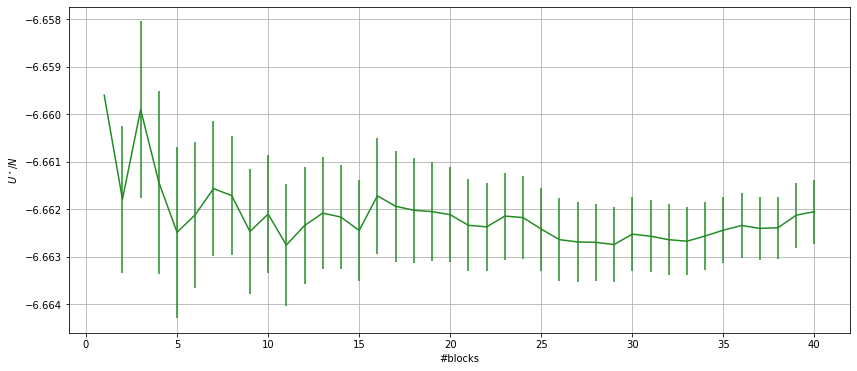

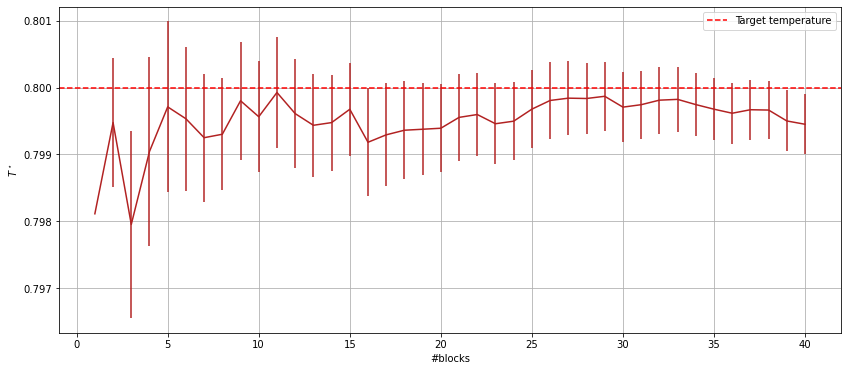

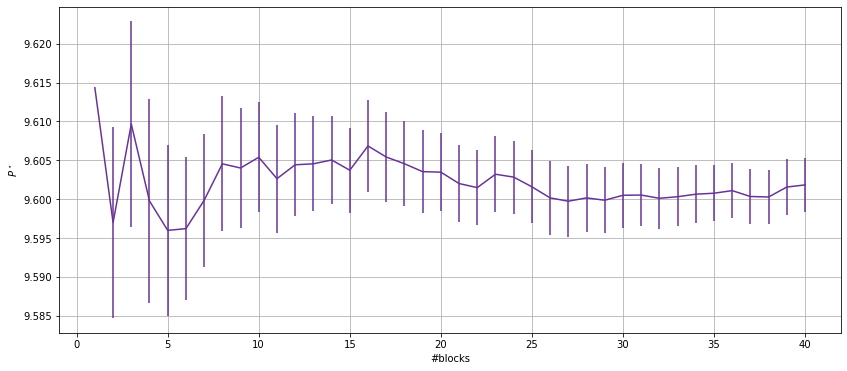

In [3]:
total_energy = np.loadtxt('OUTPUT/Solid/total_energy.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(total_energy[:,0], total_energy[:,1], yerr=total_energy[:,2])
plt.xlabel('#blocks')
plt.ylabel(r'$E^\star/N$')
plt.grid(True)
plt.show()

kinetic_energy = np.loadtxt('OUTPUT/Solid/kinetic_energy.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(kinetic_energy[:,0], kinetic_energy[:,1], yerr=kinetic_energy[:,2], color='darkorange')
plt.xlabel('#blocks')
plt.ylabel(r'$K^\star/N$')
plt.grid(True)
plt.show()

potential_energy = np.loadtxt('OUTPUT/Solid/potential_energy.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(potential_energy[:,0], potential_energy[:,1], yerr=potential_energy[:,2], color='forestgreen')
plt.xlabel('#blocks')
plt.ylabel(r'$U^\star/N$')
plt.grid(True)
plt.show()

temperature = np.loadtxt('OUTPUT/Solid/temperature.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(temperature[:,0], temperature[:,1], yerr=temperature[:,2], color='firebrick')
plt.axhline(y=0.8, color='r', ls='--', label='Target temperature')
plt.xlabel('#blocks')
plt.ylabel(r'$T^\star$')
plt.legend()
plt.grid(True)
plt.show()

pressure = np.loadtxt('OUTPUT/Solid/pressure.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(pressure[:,0], pressure[:,1], yerr=pressure[:,2], color='rebeccapurple')
plt.xlabel('#blocks')
plt.ylabel(r'$P^\star$')
plt.grid(True)
plt.show()

### Fase liquida

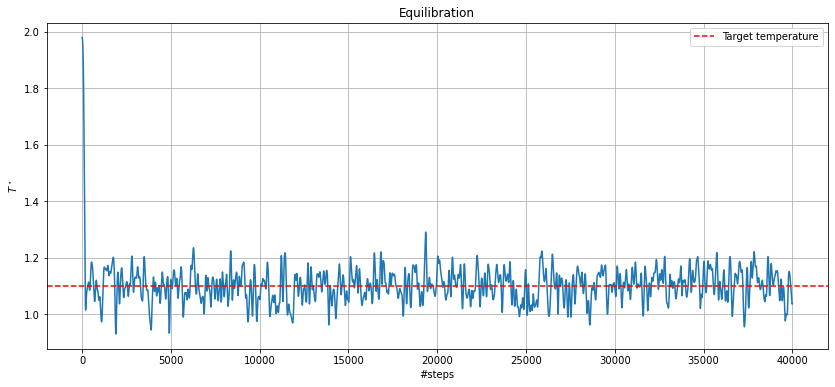

In [4]:
equilibration_temp = np.loadtxt('OUTPUT/Liquid/equilibration_temp.dat')
step = np.arange(len(equilibration_temp)) + 1
plt.figure(figsize=(14,6))
plt.plot(step, equilibration_temp)
plt.axhline(y=1.1, color='r', ls='--', label='Target temperature')
plt.title('Equilibration')
plt.xlabel('#steps')
plt.ylabel(r'$T^\star$')
plt.legend()
plt.grid(True)
plt.show()

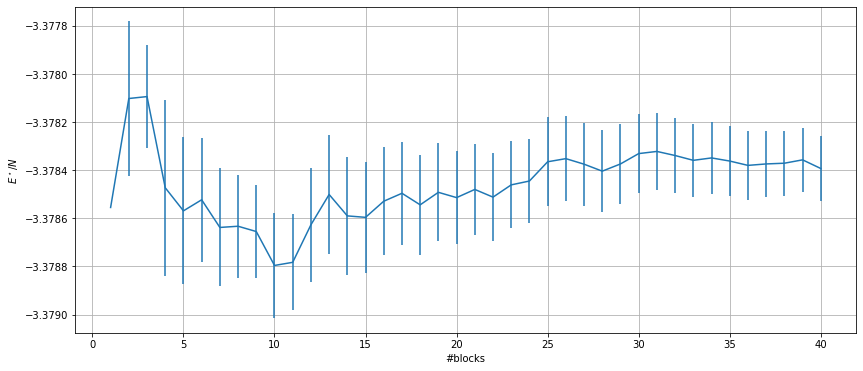

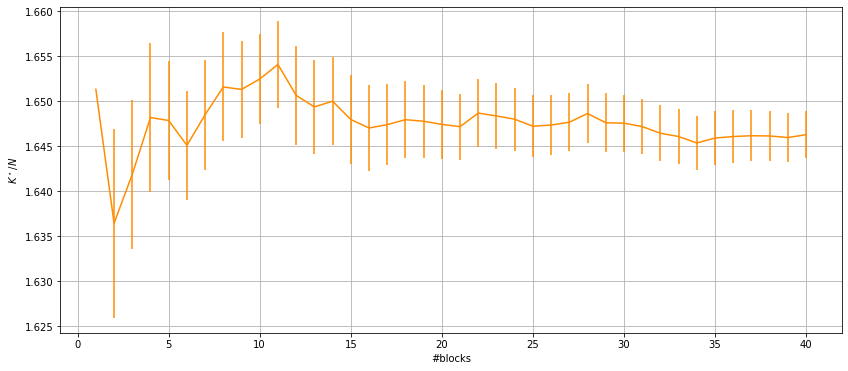

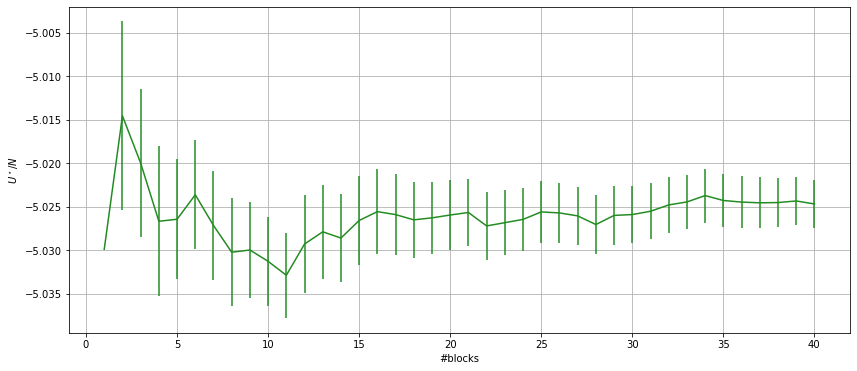

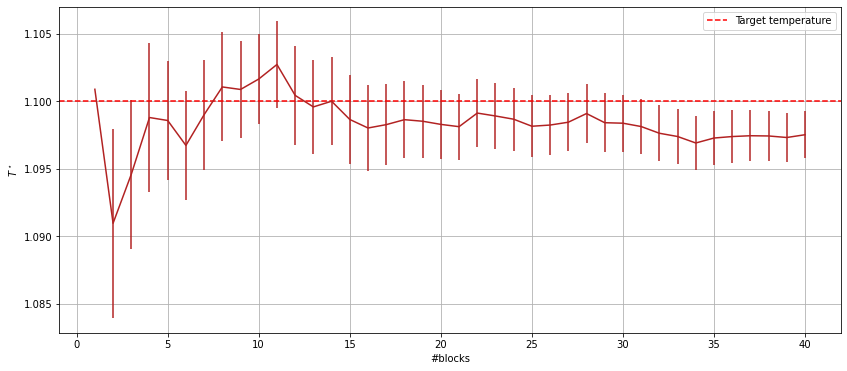

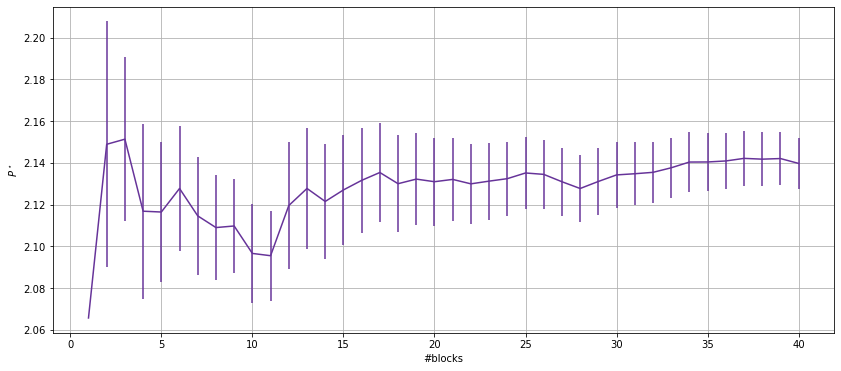

In [5]:
total_energy = np.loadtxt('OUTPUT/Liquid/total_energy.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(total_energy[:,0], total_energy[:,1], yerr=total_energy[:,2])
plt.xlabel('#blocks')
plt.ylabel(r'$E^\star/N$')
plt.grid(True)
plt.show()

kinetic_energy = np.loadtxt('OUTPUT/Liquid/kinetic_energy.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(kinetic_energy[:,0], kinetic_energy[:,1], yerr=kinetic_energy[:,2], color='darkorange')
plt.xlabel('#blocks')
plt.ylabel(r'$K^\star/N$')
plt.grid(True)
plt.show()

potential_energy = np.loadtxt('OUTPUT/Liquid/potential_energy.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(potential_energy[:,0], potential_energy[:,1], yerr=potential_energy[:,2], color='forestgreen')
plt.xlabel('#blocks')
plt.ylabel(r'$U^\star/N$')
plt.grid(True)
plt.show()

temperature = np.loadtxt('OUTPUT/Liquid/temperature.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(temperature[:,0], temperature[:,1], yerr=temperature[:,2], color='firebrick')
plt.axhline(y=1.1, color='r', ls='--', label='Target temperature')
plt.xlabel('#blocks')
plt.ylabel(r'$T^\star$')
plt.legend()
plt.grid(True)
plt.show()

pressure = np.loadtxt('OUTPUT/Liquid/pressure.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(pressure[:,0], pressure[:,1], yerr=pressure[:,2], color='rebeccapurple')
plt.xlabel('#blocks')
plt.ylabel(r'$P^\star$')
plt.grid(True)
plt.show()

### Fase gassosa

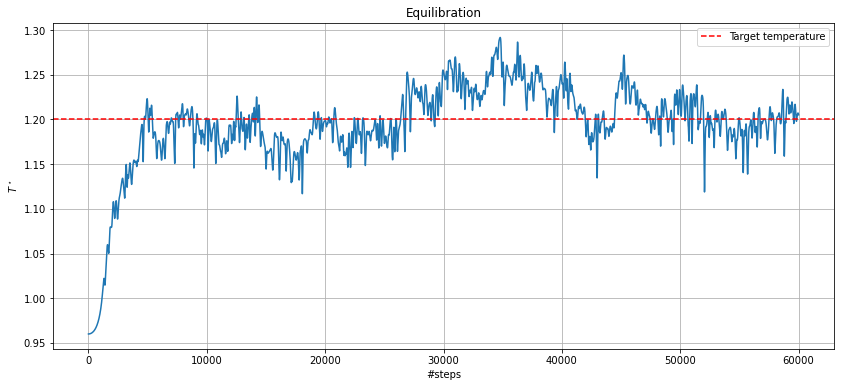

In [6]:
equilibration_temp = np.loadtxt('OUTPUT/Gas/equilibration_temp.dat')
step = np.arange(len(equilibration_temp)) + 1
plt.figure(figsize=(14,6))
plt.plot(step, equilibration_temp)
plt.axhline(y=1.2, color='r', ls='--', label='Target temperature')
plt.title('Equilibration')
plt.xlabel('#steps')
plt.ylabel(r'$T^\star$')
plt.legend()
plt.grid(True)
plt.show()

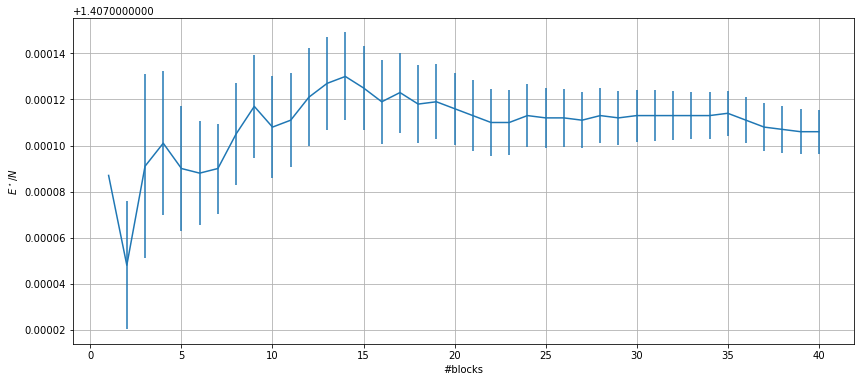

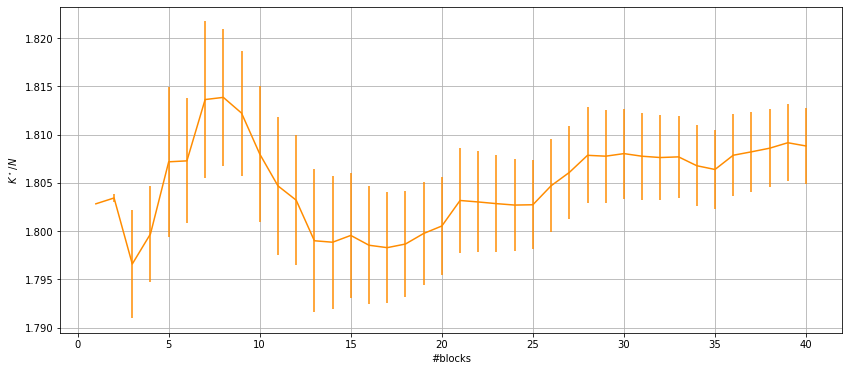

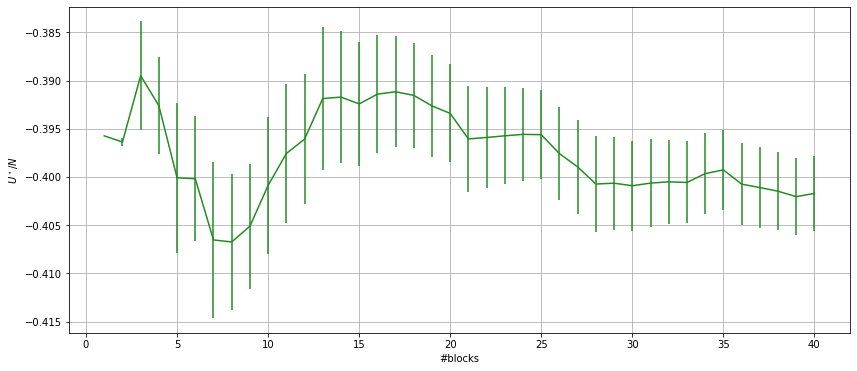

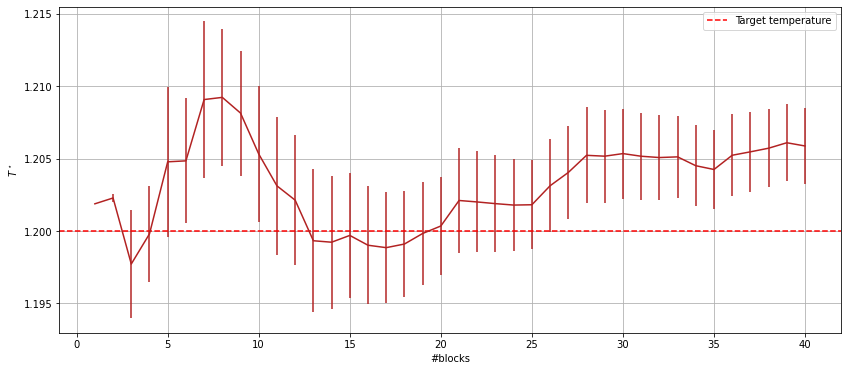

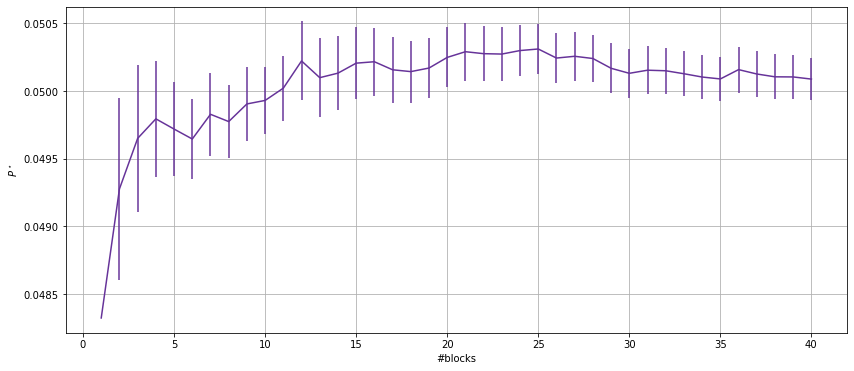

In [7]:
total_energy = np.loadtxt('OUTPUT/Gas/total_energy.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(total_energy[:,0], total_energy[:,1], yerr=total_energy[:,2])
plt.xlabel('#blocks')
plt.ylabel(r'$E^\star/N$')
plt.grid(True)
plt.show()

kinetic_energy = np.loadtxt('OUTPUT/Gas/kinetic_energy.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(kinetic_energy[:,0], kinetic_energy[:,1], yerr=kinetic_energy[:,2], color='darkorange')
plt.xlabel('#blocks')
plt.ylabel(r'$K^\star/N$')
plt.grid(True)
plt.show()

potential_energy = np.loadtxt('OUTPUT/Gas/potential_energy.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(potential_energy[:,0], potential_energy[:,1], yerr=potential_energy[:,2], color='forestgreen')
plt.xlabel('#blocks')
plt.ylabel(r'$U^\star/N$')
plt.grid(True)
plt.show()

temperature = np.loadtxt('OUTPUT/Gas/temperature.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(temperature[:,0], temperature[:,1], yerr=temperature[:,2], color='firebrick')
plt.axhline(y=1.2, color='r', ls='--', label='Target temperature')
plt.xlabel('#blocks')
plt.ylabel(r'$T^\star$')
plt.legend()
plt.grid(True)
plt.show()

pressure = np.loadtxt('OUTPUT/Gas/pressure.dat', usecols=(0, 2, 3), skiprows=1)
plt.figure(figsize=(14,6))
plt.errorbar(pressure[:,0], pressure[:,1], yerr=pressure[:,2], color='rebeccapurple')
plt.xlabel('#blocks')
plt.ylabel(r'$P^\star$')
plt.grid(True)
plt.show()

Come ci aspettavamo, l'energia totale si conserva. Sottolineamo che la fase gassosa è stata più difficile da simulare, sia nella ricerca della temperatura iniziale da cui far partire il calcolo, sia nella scelta della lunghezza dei blocchi, che infine sono stati presi con $L=10000$. Notiamo infatti che il gas si trova vicino al punto critico gas-liquido, dove il raggio delle fluttuazioni critiche è macroscopico. Tuttavia, l'uso delle condizioni periodiche al contorno inibisce la comparsa di fluttuazioni a lungo *range*. 